In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from kf.kf import KF
from kf.trajectory3D import trajectory3D
np.set_printoptions(precision=2)

**Function for initialization Kalman filter for estimating position and velocity in 3D.**

In [2]:
def init_kalman(delta_time, q, r):
    dt = delta_time
    A = np.array([
        [1, 0, 0, dt, 0, 0],
        [0, 1, 0, 0, dt, 0],
        [0, 0, 1, 0, 0, dt],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]
    ])
    B = None
    H = np.array([
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0]
    ])
    R = r**2 * np.eye(3)
    Q = q * np.diag([dt, dt, dt, dt, dt, dt])
    kf = KF(A=A, B=B, H=H, R=R, Q=Q)
    return kf

**Generate 3D trajectory, initialize Kalman filter and perform predictions and correcting updates. **

In [3]:
code = 2605
dt = 0.3 # Delta time.
q = 2. # Variance multiplier of x data.
r = .5 # Variance multiplier of y measurements.
ndat = 100 # Number of data points.
traj = trajectory3D(code, ndat=ndat, delta_time=dt, q=q, r=r)
kf = init_kalman(delta_time=dt, q=q, r=r)
for yt in traj.Y.T:
    kf.predict()
    kf.update(yt)
    kf.log()

log_x = np.array(kf.log_x).T

**Plot real position (black), estimated position (orange) and noisy measurements (blue crosses) in 3D**

In [4]:
%matplotlib
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(traj.Y[0, :], traj.Y[1, :], traj.Y[2, :], '+')
ax.plot(log_x[0, :], log_x[1, :], log_x[2, :])
ax.plot(traj.X[0, :], traj.X[1, :], traj.X[2, :], c='black')
plt.show()

Using matplotlib backend: TkAgg


**Plot estimated (lines) and real (dashed) velocities separately for axes x (red), y (green), z (blue).**

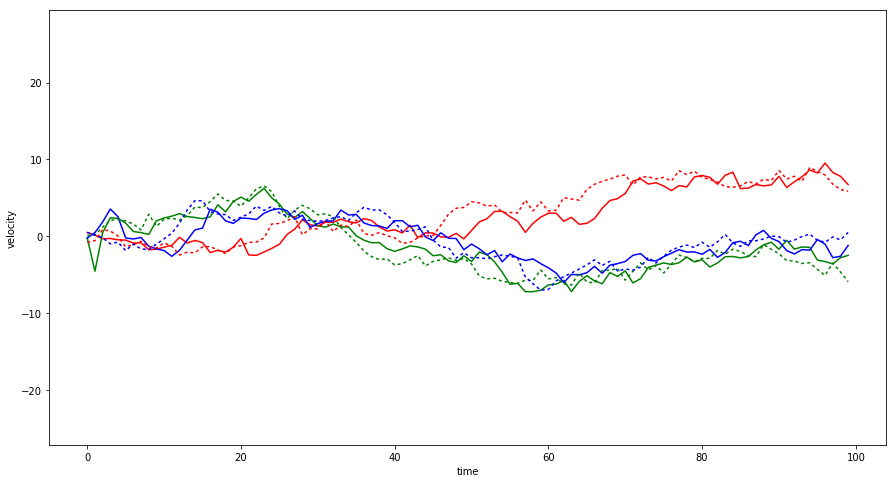

In [5]:
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.plot(log_x[3, :], c='red')
plt.plot(log_x[4, :], c='green')
plt.plot(log_x[5, :], c='blue')
plt.plot(traj.X[3, :], c='red', dashes=[2,2])
plt.plot(traj.X[4, :], c='green', dashes=[2,2])
plt.plot(traj.X[5, :], c='blue', dashes=[2,2])
plt.xlabel("time")
plt.ylabel("velocity")
plt.axis('equal')
plt.show()